In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.optimizers import Adam
from sklearn import metrics

In [3]:
data=pd.read_csv("monthly_milk_production_1.csv")

In [4]:
XY_train=data.Production.values
XY_train

array([589, 561, 640, 656, 727, 697, 640, 599, 568, 577, 553, 582, 600,
       566, 653, 673, 742, 716, 660, 617, 583, 587, 565, 598, 628, 618,
       688, 705, 770, 736, 678, 639, 604, 611, 594, 634, 658, 622, 709,
       722, 782, 756, 702, 653, 615, 621, 602, 635, 677, 635, 736, 755,
       811, 798, 735, 697, 661, 667, 645, 688, 713, 667, 762, 784, 837,
       817, 767, 722, 681, 687, 660, 698, 717, 696, 775, 796, 858, 826,
       783, 740, 701, 706, 677, 711, 734, 690, 785, 805, 871, 845, 801,
       764, 725, 723, 690, 734, 750, 707, 807, 824, 886, 859, 819, 783,
       740, 747, 711, 751, 804, 756, 860, 878, 942, 913, 869, 834, 790,
       800, 763, 800, 826, 799, 890, 900, 961, 935, 894, 855, 809, 810,
       766, 805, 821, 773, 883, 898, 957, 924, 881, 837, 784, 791, 760,
       802, 828, 778, 889, 902, 969, 947, 908, 867, 815, 812, 773, 813,
       834, 782, 892, 903, 966, 937, 896, 858, 817, 827, 797, 843],
      dtype=int64)

In [5]:
XY_train_reshaped=XY_train.reshape(-1,1)
XY_train_reshaped

array([[589],
       [561],
       [640],
       [656],
       [727],
       [697],
       [640],
       [599],
       [568],
       [577],
       [553],
       [582],
       [600],
       [566],
       [653],
       [673],
       [742],
       [716],
       [660],
       [617],
       [583],
       [587],
       [565],
       [598],
       [628],
       [618],
       [688],
       [705],
       [770],
       [736],
       [678],
       [639],
       [604],
       [611],
       [594],
       [634],
       [658],
       [622],
       [709],
       [722],
       [782],
       [756],
       [702],
       [653],
       [615],
       [621],
       [602],
       [635],
       [677],
       [635],
       [736],
       [755],
       [811],
       [798],
       [735],
       [697],
       [661],
       [667],
       [645],
       [688],
       [713],
       [667],
       [762],
       [784],
       [837],
       [817],
       [767],
       [722],
       [681],
       [687],
       [660],
      

In [6]:
scaler = MinMaxScaler()
XY_train_normalized = scaler.fit_transform(XY_train_reshaped)
print(XY_train_normalized)

[[0.08653846]
 [0.01923077]
 [0.20913462]
 [0.24759615]
 [0.41826923]
 [0.34615385]
 [0.20913462]
 [0.11057692]
 [0.03605769]
 [0.05769231]
 [0.        ]
 [0.06971154]
 [0.11298077]
 [0.03125   ]
 [0.24038462]
 [0.28846154]
 [0.45432692]
 [0.39182692]
 [0.25721154]
 [0.15384615]
 [0.07211538]
 [0.08173077]
 [0.02884615]
 [0.10817308]
 [0.18028846]
 [0.15625   ]
 [0.32451923]
 [0.36538462]
 [0.52163462]
 [0.43990385]
 [0.30048077]
 [0.20673077]
 [0.12259615]
 [0.13942308]
 [0.09855769]
 [0.19471154]
 [0.25240385]
 [0.16586538]
 [0.375     ]
 [0.40625   ]
 [0.55048077]
 [0.48798077]
 [0.35817308]
 [0.24038462]
 [0.14903846]
 [0.16346154]
 [0.11778846]
 [0.19711538]
 [0.29807692]
 [0.19711538]
 [0.43990385]
 [0.48557692]
 [0.62019231]
 [0.58894231]
 [0.4375    ]
 [0.34615385]
 [0.25961538]
 [0.27403846]
 [0.22115385]
 [0.32451923]
 [0.38461538]
 [0.27403846]
 [0.50240385]
 [0.55528846]
 [0.68269231]
 [0.63461538]
 [0.51442308]
 [0.40625   ]
 [0.30769231]
 [0.32211538]
 [0.25721154]
 [0.34

In [7]:
x_train=[]
y_train=[]
for i in range(0,len(XY_train_normalized)-3):
    x_train.append(XY_train_normalized[i:i+3])
    y_train.append(XY_train_normalized[i+3])

In [8]:
x_train=np.array(x_train)
y_train=np.array(y_train)

In [9]:
x_train.shape

(165, 3, 1)

In [10]:
x_test=x_train.copy()
y_test=y_train.copy()

In [21]:
y_test

array([[656.],
       [727.],
       [697.],
       [640.],
       [599.],
       [568.],
       [577.],
       [553.],
       [582.],
       [600.],
       [566.],
       [653.],
       [673.],
       [742.],
       [716.],
       [660.],
       [617.],
       [583.],
       [587.],
       [565.],
       [598.],
       [628.],
       [618.],
       [688.],
       [705.],
       [770.],
       [736.],
       [678.],
       [639.],
       [604.],
       [611.],
       [594.],
       [634.],
       [658.],
       [622.],
       [709.],
       [722.],
       [782.],
       [756.],
       [702.],
       [653.],
       [615.],
       [621.],
       [602.],
       [635.],
       [677.],
       [635.],
       [736.],
       [755.],
       [811.],
       [798.],
       [735.],
       [697.],
       [661.],
       [667.],
       [645.],
       [688.],
       [713.],
       [667.],
       [762.],
       [784.],
       [837.],
       [817.],
       [767.],
       [722.],
       [681.],
       [68

In [12]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape = (x_train.shape[1],1),activation='relu'))
model.add(LSTM(50,return_sequences=False,activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
history=model.fit(x_train,y_train, batch_size = 2,epochs = 30)

c:\Users\Yashvi\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2003
Epoch 2/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0334 
Epoch 3/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0288
Epoch 4/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0257
Epoch 5/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0256
Epoch 6/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0278
Epoch 7/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0255
Epoch 8/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0248
Epoch 9/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0235
Epoch 10/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0222
Epoch 11/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0204
Epoch 12/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0177
Epoch 13/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0151
Epoch 14/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0164
Epoch 15/30
83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0147
Epoch 16/30
83/83 

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 3, 50)          │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)

In [14]:
y_pred_normalized=model.predict(x_test)
y_pred=scaler.inverse_transform(y_pred_normalized)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step


In [15]:
y_test=scaler.inverse_transform(y_test)

In [16]:
y_m=data['Date'].str.split('-',expand=True)
data[['Year','Month']]=y_m

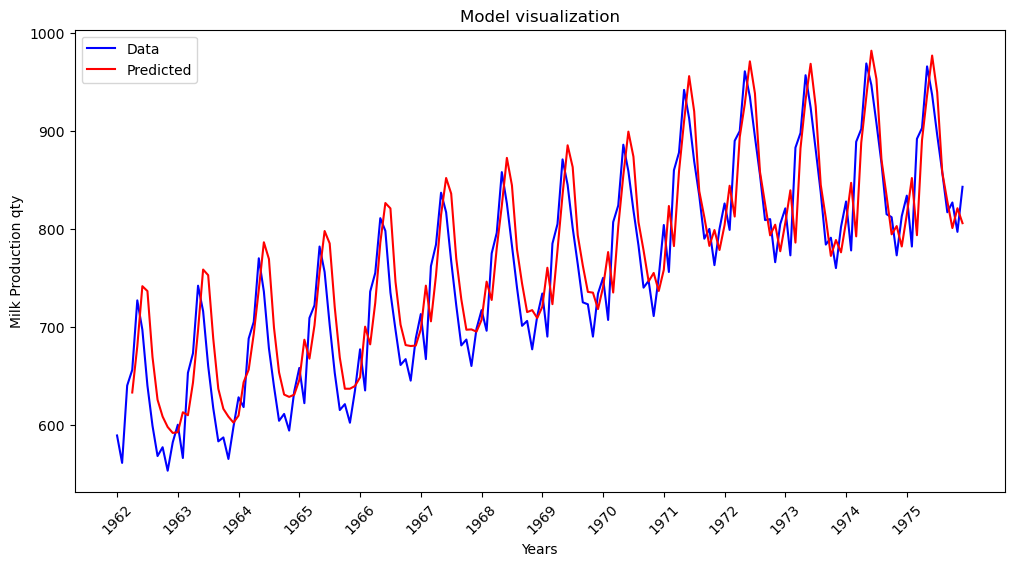

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(data.Date,data.Production, label = "Data", color = "b")
plt.plot(data.Date[3:],y_pred, label = "Predicted", color = "r")
plt.xlabel("Years")
plt.ylabel("Milk Production qty")
plt.title("Model visualization")
plt.legend()
date_ticks = data.Date[::12] 
date_labels = data.Year[::12]  
plt.xticks(ticks=date_ticks, labels=date_labels, rotation=45)

plt.show()

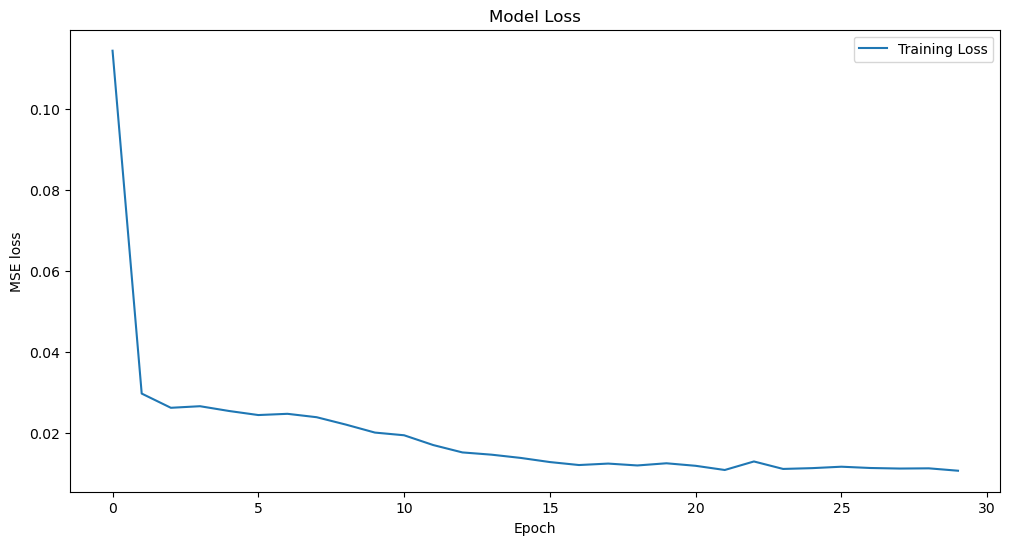

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE loss')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")


r2 = r2_score(y_test, y_pred)
print(f"R2 score is {r2}")

Root Mean Squared Error (RMSE): 43.12492193441435
R2 score is 0.8156929436815497
